### 이진분류 : 영화리뷰

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)

In [3]:
x_train.shape

(25000,)

In [4]:
# 리뷰를 텍스트로 디코딩

In [5]:
import tensorflow as tf

In [6]:
word_index = imdb.get_word_index()

In [7]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])

In [8]:
decoded_review = " ".join(
    reverse_word_index.get(i-3,"?") for i in x_train[0]
)

In [9]:
# 데이터 준비
# 숫자를 멀티 - 핫 인코딩
import numpy as np
def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [10]:
temp =[
    [1,2],
    [3,4]
]
np.array(temp).shape

(2, 2)

In [11]:
vectorize_sequences(temp,5)

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [12]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### 신경망 모델 생성

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])
# 둘 중 하나이기 때문에 손실함수는 binary를 주었음

In [16]:
x_train.shape, y_train.shape

((25000, 1000), (25000,))

In [17]:
# 훈련데이터를 학습용과 검증용 데이터로 split
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,random_state=32)
x_tr.shape, x_val.shape

((18750, 1000), (6250, 1000))

In [18]:
# 모델 훈련
hist = model.fit(x_tr,y_tr, epochs=20, batch_size=512, validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
37/37 [==============================] - 1s 7ms/step - loss: 0.6592 - acc: 0.6039 - val_loss: 0.5464 - val_acc: 0.7672
Epoch 2/20
37/37 [==============================] - 0s 4ms/step - loss: 0.4423 - acc: 0.8150 - val_loss: 0.3680 - val_acc: 0.8427
Epoch 3/20
37/37 [==============================] - 0s 4ms/step - loss: 0.3420 - acc: 0.8588 - val_loss: 0.3491 - val_acc: 0.8549
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3154 - acc: 0.8711 - val_loss: 0.3328 - val_acc: 0.8584
Epoch 5/20
37/37 [==============================] - 0s 4ms/step - loss: 0.3009 - acc: 0.8762 - val_loss: 0.3309 - val_acc: 0.8600
Epoch 6/20
37/37 [==============================] - 0s 4ms/step - loss: 0.2933 - acc: 0.8813 - val_loss: 0.3317 - val_acc: 0.8611
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.2868 - acc: 0.8833 - val_loss: 0.3328 - val_acc: 0.8597
Epoch 8/20
37/37 [==============================] - 0s 3ms/step - loss: 0.2809 - acc: 0.88

In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

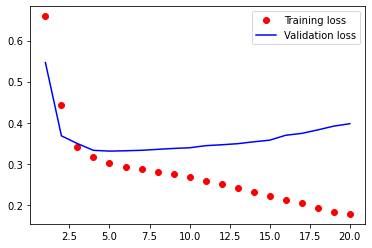

In [20]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training loss")
plt.plot(epochs, val_loss_values,"b",label="Validation loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

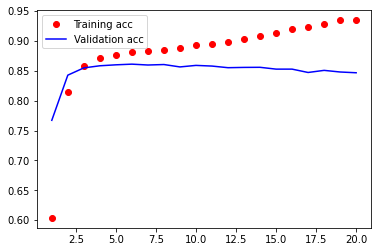

In [21]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training acc")
plt.plot(epochs, val_loss_values,"b",label="Validation acc")
plt.legend()
plt.show

In [22]:
# 예측
model.predict(x_test)

array([[0.13123822],
       [0.99927825],
       [0.34367016],
       ...,
       [0.06082785],
       [0.02816468],
       [0.7276551 ]], dtype=float32)

In [23]:
# 평가
model.evaluate(x_test,y_test)

782/782 [==============================] - 0s 559us/step - loss: 0.4038 - acc: 0.8426


[0.40379559993743896, 0.8425599932670593]

In [24]:
# 다중분류
from tensorflow.keras.datasets import reuters
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)
x_train.shape, x_test.shape

((8982,), (2246,))

In [25]:
x_train = vectorize_sequences(x_train, 10000)
x_test = vectorize_sequences(x_test,10000)

In [26]:
# 레이블 인코딩을 했을 경우 손실함수를 categorical_crossentropy로 줘야함
# 레이블 인코딩을 하지 않았을 경우 손실함수를 sparse_categorical_crossentropy로 줘야함
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [27]:
model = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46,activation='softmax')
])

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [29]:
# 훈련데이터를 학습용과 검증용 데이터로 split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)
x_tr.shape, x_val.shape

((6736, 10000), (2246, 10000))

In [30]:
hist = model.fit(x_tr,y_tr, epochs=30, batch_size = 128, validation_data=(x_val,y_val),verbose=1)

Epoch 1/30
53/53 [==============================] - 1s 13ms/step - loss: 3.0277 - acc: 0.2589 - val_loss: 1.8136 - val_acc: 0.5788
Epoch 2/30
53/53 [==============================] - 1s 11ms/step - loss: 1.8532 - acc: 0.5572 - val_loss: 1.5469 - val_acc: 0.6545
Epoch 3/30
53/53 [==============================] - 1s 11ms/step - loss: 1.5672 - acc: 0.6210 - val_loss: 1.4069 - val_acc: 0.6906
Epoch 4/30
53/53 [==============================] - 1s 11ms/step - loss: 1.3703 - acc: 0.6615 - val_loss: 1.3158 - val_acc: 0.7088
Epoch 5/30
53/53 [==============================] - 1s 10ms/step - loss: 1.2404 - acc: 0.6909 - val_loss: 1.2760 - val_acc: 0.7191
Epoch 6/30
53/53 [==============================] - 1s 10ms/step - loss: 1.1578 - acc: 0.7056 - val_loss: 1.2790 - val_acc: 0.7217
Epoch 7/30
53/53 [==============================] - 1s 10ms/step - loss: 1.0676 - acc: 0.7234 - val_loss: 1.2685 - val_acc: 0.7240
Epoch 8/30
53/53 [==============================] - 1s 10ms/step - loss: 0.9954 - a

<function matplotlib.pyplot.show(close=None, block=None)>

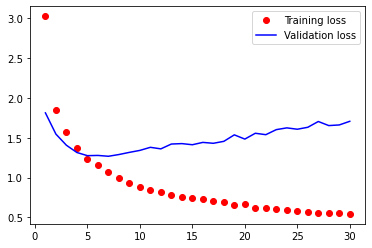

In [31]:
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training loss")
plt.plot(epochs, val_loss_values,"b",label="Validation loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

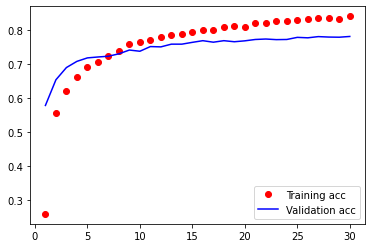

In [32]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training acc")
plt.plot(epochs, val_loss_values,"b",label="Validation acc")
plt.legend()
plt.show

In [33]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.8351 - acc: 0.7645


[1.835121989250183, 0.7644701600074768]

### 보스턴 주택 가격

In [34]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data,test_targets) = boston_housing.load_data()

In [35]:
train_data.shape

(404, 13)

In [36]:
# 데이터 정규화
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)

train_data /= std

test_data -= mean
test_data /= std

In [37]:
# 모델 정의
# 분류가 아닌 예측모델이므로 마지막 층에는 활성화함수를 따로 주지 않음
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [38]:
# k-fold 검증
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16)
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)

#0번째 폴드 처리중
Epoch 1/100
19/19 [==============================] - 0s 773us/step - loss: 551.2390 - mae: 21.5995
Epoch 2/100
19/19 [==============================] - 0s 720us/step - loss: 455.9174 - mae: 19.1991
Epoch 3/100
19/19 [==============================] - 0s 763us/step - loss: 327.0917 - mae: 15.6148
Epoch 4/100
19/19 [==============================] - 0s 692us/step - loss: 178.2334 - mae: 11.0416
Epoch 5/100
19/19 [==============================] - 0s 868us/step - loss: 76.7663 - mae: 6.7633
Epoch 6/100
19/19 [==============================] - 0s 0s/step - loss: 44.5442 - mae: 5.1972
Epoch 7/100
19/19 [==============================] - 0s 0s/step - loss: 31.4323 - mae: 4.2390
Epoch 8/100
19/19 [==============================] - 0s 0s/step - loss: 25.5943 - mae: 3.7724
Epoch 9/100
19/19 [==============================] - 0s 868us/step - loss: 22.7743 - mae: 3.5056
Epoch 10/100
19/19 [==============================] - 0s 868us/step - loss: 21.3890 - mae: 3.3714
Epoch 11/100
19/19

19/19 [==============================] - 0s 867us/step - loss: 7.1652 - mae: 1.8954
Epoch 82/100
19/19 [==============================] - 0s 868us/step - loss: 7.0147 - mae: 1.8696
Epoch 83/100
19/19 [==============================] - 0s 868us/step - loss: 7.2489 - mae: 1.8908
Epoch 84/100
19/19 [==============================] - 0s 0s/step - loss: 6.9873 - mae: 1.8841
Epoch 85/100
19/19 [==============================] - 0s 778us/step - loss: 6.7638 - mae: 1.8567
Epoch 86/100
19/19 [==============================] - 0s 699us/step - loss: 6.7825 - mae: 1.8309
Epoch 87/100
19/19 [==============================] - ETA: 0s - loss: 4.5978 - mae: 1.614 - 0s 654us/step - loss: 6.8980 - mae: 1.8521
Epoch 88/100
19/19 [==============================] - 0s 58us/step - loss: 6.7495 - mae: 1.8327
Epoch 89/100
19/19 [==============================] - 0s 868us/step - loss: 6.6545 - mae: 1.8480
Epoch 90/100
19/19 [==============================] - 0s 868us/step - loss: 6.6565 - mae: 1.8289
Epoch 91/

19/19 [==============================] - 0s 709us/step - loss: 7.8103 - mae: 1.9341
Epoch 63/100
19/19 [==============================] - 0s 707us/step - loss: 7.6440 - mae: 1.9502
Epoch 64/100
19/19 [==============================] - 0s 723us/step - loss: 7.5075 - mae: 1.9239
Epoch 65/100
19/19 [==============================] - 0s 174us/step - loss: 7.5989 - mae: 1.9603
Epoch 66/100
19/19 [==============================] - ETA: 0s - loss: 7.0953 - mae: 2.166 - 0s 869us/step - loss: 7.4067 - mae: 1.8945
Epoch 67/100
19/19 [==============================] - 0s 866us/step - loss: 7.3756 - mae: 1.9037
Epoch 68/100
19/19 [==============================] - 0s 868us/step - loss: 7.3622 - mae: 1.9127
Epoch 69/100
19/19 [==============================] - 0s 868us/step - loss: 7.1854 - mae: 1.8712
Epoch 70/100
19/19 [==============================] - 0s 946us/step - loss: 7.1436 - mae: 1.8764
Epoch 71/100
19/19 [==============================] - 0s 684us/step - loss: 7.1167 - mae: 1.8886
Epoch

19/19 [==============================] - 0s 869us/step - loss: 7.7574 - mae: 2.0421
Epoch 45/100
19/19 [==============================] - 0s 868us/step - loss: 7.7268 - mae: 2.0443
Epoch 46/100
19/19 [==============================] - 0s 868us/step - loss: 7.7293 - mae: 2.0506
Epoch 47/100
19/19 [==============================] - 0s 867us/step - loss: 7.9877 - mae: 2.0736
Epoch 48/100
19/19 [==============================] - 0s 868us/step - loss: 7.6194 - mae: 2.0239
Epoch 49/100
19/19 [==============================] - 0s 868us/step - loss: 7.4596 - mae: 2.0074
Epoch 50/100
19/19 [==============================] - 0s 868us/step - loss: 7.4129 - mae: 2.0009
Epoch 51/100
19/19 [==============================] - 0s 0s/step - loss: 7.2838 - mae: 1.9735
Epoch 52/100
19/19 [==============================] - 0s 0s/step - loss: 7.2210 - mae: 1.9776
Epoch 53/100
19/19 [==============================] - 0s 868us/step - loss: 7.1434 - mae: 1.9651
Epoch 54/100
19/19 [=============================

19/19 [==============================] - 0s 866us/step - loss: 10.8211 - mae: 2.2883
Epoch 28/100
19/19 [==============================] - 0s 869us/step - loss: 10.6952 - mae: 2.2792
Epoch 29/100
19/19 [==============================] - 0s 867us/step - loss: 10.4750 - mae: 2.2716
Epoch 30/100
19/19 [==============================] - 0s 868us/step - loss: 10.3289 - mae: 2.2635
Epoch 31/100
19/19 [==============================] - 0s 0s/step - loss: 10.2046 - mae: 2.2443
Epoch 32/100
19/19 [==============================] - 0s 0s/step - loss: 10.1457 - mae: 2.2352
Epoch 33/100
19/19 [==============================] - 0s 868us/step - loss: 9.9269 - mae: 2.2029
Epoch 34/100
19/19 [==============================] - 0s 868us/step - loss: 9.8196 - mae: 2.2128
Epoch 35/100
19/19 [==============================] - 0s 868us/step - loss: 9.7939 - mae: 2.2017
Epoch 36/100
19/19 [==============================] - 0s 869us/step - loss: 9.4775 - mae: 2.1783
Epoch 37/100
19/19 [=======================

In [39]:
all_scores

[2.119262933731079, 2.5240633487701416, 2.385646104812622, 2.5649399757385254]

In [40]:
np.mean(all_scores)

2.398478090763092

In [41]:
# k-겹 검증 
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,
                        validation_data=(val_data,val_targets) )
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_mae_histories.append(history.history['val_mae'])

#0번째 폴드 처리중
Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 546.3967 - mae: 21.4988 - val_loss: 492.8980 - val_mae: 19.8175
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 464.2866 - mae: 19.4489 - val_loss: 387.3181 - val_mae: 16.9774
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 334.2720 - mae: 15.8786 - val_loss: 230.6311 - val_mae: 12.3230
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 170.8659 - mae: 10.6825 - val_loss: 87.2198 - val_mae: 6.9700
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 70.7891 - mae: 6.3952 - val_loss: 41.5887 - val_mae: 4.6038
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 45.1395 - mae: 5.0452 - val_loss: 32.7910 - val_mae: 3.9684
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 33.6791 - mae: 4.2942 - val_loss: 28.9832 - val_mae: 3.6287
Epoch 8/500
19/19 [========================

19/19 [==============================] - 0s 2ms/step - loss: 8.5981 - mae: 2.0808 - val_loss: 7.6818 - val_mae: 1.9404
Epoch 63/500
19/19 [==============================] - 0s 2ms/step - loss: 8.6316 - mae: 2.1143 - val_loss: 8.1742 - val_mae: 2.0664
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 8.4235 - mae: 2.0461 - val_loss: 7.7568 - val_mae: 1.9564
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 8.2827 - mae: 2.0460 - val_loss: 7.9370 - val_mae: 2.0183
Epoch 66/500
19/19 [==============================] - 0s 2ms/step - loss: 8.5391 - mae: 2.0638 - val_loss: 7.9162 - val_mae: 2.0114
Epoch 67/500
19/19 [==============================] - 0s 2ms/step - loss: 8.3197 - mae: 2.0622 - val_loss: 7.8710 - val_mae: 2.0036
Epoch 68/500
19/19 [==============================] - 0s 1ms/step - loss: 8.4158 - mae: 2.0781 - val_loss: 7.5792 - val_mae: 1.9296
Epoch 69/500
19/19 [==============================] - 0s 2ms/step - loss: 8.3416 - mae: 2

Epoch 124/500
19/19 [==============================] - 0s 2ms/step - loss: 5.8484 - mae: 1.6954 - val_loss: 7.1304 - val_mae: 1.9274
Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 5.8552 - mae: 1.7007 - val_loss: 7.0126 - val_mae: 1.9157
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 5.8369 - mae: 1.7001 - val_loss: 7.2412 - val_mae: 1.8887
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 5.7374 - mae: 1.6878 - val_loss: 7.3377 - val_mae: 1.9930
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 5.9529 - mae: 1.7084 - val_loss: 7.1470 - val_mae: 1.9171
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 5.9167 - mae: 1.7195 - val_loss: 7.3894 - val_mae: 1.9603
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 5.9375 - mae: 1.7711 - val_loss: 7.1157 - val_mae: 1.8784
Epoch 131/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 979us/step - loss: 3.9872 - mae: 1.4069 - val_loss: 7.4095 - val_mae: 1.9541
Epoch 186/500
19/19 [==============================] - 0s 868us/step - loss: 3.9316 - mae: 1.3956 - val_loss: 7.3021 - val_mae: 1.9293
Epoch 187/500
19/19 [==============================] - 0s 2ms/step - loss: 3.9943 - mae: 1.4294 - val_loss: 7.5746 - val_mae: 2.0419
Epoch 188/500
19/19 [==============================] - 0s 2ms/step - loss: 3.8867 - mae: 1.4273 - val_loss: 7.5198 - val_mae: 1.9427
Epoch 189/500
19/19 [==============================] - 0s 2ms/step - loss: 3.9089 - mae: 1.4007 - val_loss: 8.2355 - val_mae: 2.1478
Epoch 190/500
19/19 [==============================] - 0s 2ms/step - loss: 3.9898 - mae: 1.4411 - val_loss: 7.4937 - val_mae: 2.0148
Epoch 191/500
19/19 [==============================] - 0s 2ms/step - loss: 4.0109 - mae: 1.4574 - val_loss: 8.0322 - val_mae: 2.0115
Epoch 192/500
19/19 [==============================] - 0s 2ms/step - loss: 4.00

19/19 [==============================] - 0s 2ms/step - loss: 2.7396 - mae: 1.1778 - val_loss: 8.2819 - val_mae: 2.0618
Epoch 247/500
19/19 [==============================] - 0s 2ms/step - loss: 2.6971 - mae: 1.1737 - val_loss: 8.3350 - val_mae: 2.1359
Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 2.8075 - mae: 1.2330 - val_loss: 8.2829 - val_mae: 2.0830
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 2.7876 - mae: 1.2309 - val_loss: 8.3992 - val_mae: 2.0471
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 2.7885 - mae: 1.2537 - val_loss: 8.4625 - val_mae: 2.1564
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 2.8222 - mae: 1.2066 - val_loss: 8.3554 - val_mae: 2.1295
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 2.7487 - mae: 1.2133 - val_loss: 8.3181 - val_mae: 2.1236
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 2.7962 -

Epoch 308/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9299 - mae: 0.9781 - val_loss: 9.4629 - val_mae: 2.2508
Epoch 309/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0075 - mae: 1.0420 - val_loss: 9.0713 - val_mae: 2.1300
Epoch 310/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0071 - mae: 1.0294 - val_loss: 9.1651 - val_mae: 2.1730
Epoch 311/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9277 - mae: 1.0173 - val_loss: 9.2456 - val_mae: 2.1152
Epoch 312/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0213 - mae: 1.0330 - val_loss: 9.2176 - val_mae: 2.1691
Epoch 313/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0357 - mae: 1.0199 - val_loss: 9.1333 - val_mae: 2.1702
Epoch 314/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9143 - mae: 1.0040 - val_loss: 8.9704 - val_mae: 2.1225
Epoch 315/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 1.5355 - mae: 0.8725 - val_loss: 9.8728 - val_mae: 2.2687
Epoch 370/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5053 - mae: 0.8740 - val_loss: 9.4978 - val_mae: 2.1612
Epoch 371/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4540 - mae: 0.8527 - val_loss: 9.6837 - val_mae: 2.2171
Epoch 372/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5752 - mae: 0.8953 - val_loss: 9.9720 - val_mae: 2.2574
Epoch 373/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5589 - mae: 0.8791 - val_loss: 9.9385 - val_mae: 2.2665
Epoch 374/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4791 - mae: 0.8492 - val_loss: 9.8892 - val_mae: 2.2110
Epoch 375/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4018 - mae: 0.8163 - val_loss: 9.8592 - val_mae: 2.2110
Epoch 376/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3967 -

19/19 [==============================] - 0s 2ms/step - loss: 1.1529 - mae: 0.7486 - val_loss: 10.8005 - val_mae: 2.3163
Epoch 431/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2321 - mae: 0.7613 - val_loss: 10.5221 - val_mae: 2.2809
Epoch 432/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3324 - mae: 0.8347 - val_loss: 10.6114 - val_mae: 2.3017
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1963 - mae: 0.7679 - val_loss: 10.6449 - val_mae: 2.3112
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2331 - mae: 0.8449 - val_loss: 10.8267 - val_mae: 2.3262
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1404 - mae: 0.7529 - val_loss: 10.7858 - val_mae: 2.3031
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1243 - mae: 0.7317 - val_loss: 10.5689 - val_mae: 2.2908
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 1

Epoch 491/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9736 - mae: 0.6937 - val_loss: 11.5345 - val_mae: 2.4022
Epoch 492/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9755 - mae: 0.6989 - val_loss: 11.3585 - val_mae: 2.3878
Epoch 493/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9029 - mae: 0.6440 - val_loss: 11.2424 - val_mae: 2.3861
Epoch 494/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8886 - mae: 0.6507 - val_loss: 11.1589 - val_mae: 2.3491
Epoch 495/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8953 - mae: 0.6344 - val_loss: 11.1170 - val_mae: 2.3457
Epoch 496/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9414 - mae: 0.6696 - val_loss: 10.8964 - val_mae: 2.2749
Epoch 497/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9619 - mae: 0.6532 - val_loss: 11.6143 - val_mae: 2.4294
Epoch 498/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 8.4544 - mae: 2.0447 - val_loss: 11.7820 - val_mae: 2.6748
Epoch 52/500
19/19 [==============================] - 0s 2ms/step - loss: 8.4278 - mae: 2.0743 - val_loss: 11.4286 - val_mae: 2.6287
Epoch 53/500
19/19 [==============================] - 0s 2ms/step - loss: 8.4900 - mae: 2.0180 - val_loss: 11.4251 - val_mae: 2.6302
Epoch 54/500
19/19 [==============================] - 0s 2ms/step - loss: 8.4132 - mae: 2.0478 - val_loss: 11.7567 - val_mae: 2.6835
Epoch 55/500
19/19 [==============================] - 0s 2ms/step - loss: 8.2532 - mae: 2.0418 - val_loss: 11.1553 - val_mae: 2.5896
Epoch 56/500
19/19 [==============================] - 0s 2ms/step - loss: 8.2165 - mae: 2.0025 - val_loss: 11.4079 - val_mae: 2.6395
Epoch 57/500
19/19 [==============================] - 0s 2ms/step - loss: 8.1340 - mae: 2.0092 - val_loss: 11.1321 - val_mae: 2.5939
Epoch 58/500
19/19 [==============================] - 0s 2ms/step - loss: 8.1632 -

19/19 [==============================] - 0s 2ms/step - loss: 5.6175 - mae: 1.6687 - val_loss: 10.3969 - val_mae: 2.4798
Epoch 113/500
19/19 [==============================] - 0s 2ms/step - loss: 5.5996 - mae: 1.6733 - val_loss: 10.3372 - val_mae: 2.4735
Epoch 114/500
19/19 [==============================] - 0s 2ms/step - loss: 5.7420 - mae: 1.7257 - val_loss: 9.8203 - val_mae: 2.4347
Epoch 115/500
19/19 [==============================] - 0s 2ms/step - loss: 5.6598 - mae: 1.6832 - val_loss: 10.4868 - val_mae: 2.5001
Epoch 116/500
19/19 [==============================] - 0s 2ms/step - loss: 5.5016 - mae: 1.6674 - val_loss: 10.4409 - val_mae: 2.4943
Epoch 117/500
19/19 [==============================] - 0s 2ms/step - loss: 5.4453 - mae: 1.6592 - val_loss: 10.4742 - val_mae: 2.4791
Epoch 118/500
19/19 [==============================] - 0s 2ms/step - loss: 5.4790 - mae: 1.6907 - val_loss: 9.9667 - val_mae: 2.4229
Epoch 119/500
19/19 [==============================] - 0s 2ms/step - loss: 5.7

19/19 [==============================] - 0s 2ms/step - loss: 3.6281 - mae: 1.4115 - val_loss: 10.1663 - val_mae: 2.4410
Epoch 174/500
19/19 [==============================] - 0s 2ms/step - loss: 3.6581 - mae: 1.3992 - val_loss: 10.4411 - val_mae: 2.4635
Epoch 175/500
19/19 [==============================] - 0s 2ms/step - loss: 3.5756 - mae: 1.3529 - val_loss: 11.1381 - val_mae: 2.5676
Epoch 176/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4920 - mae: 1.3841 - val_loss: 10.4060 - val_mae: 2.4217
Epoch 177/500
19/19 [==============================] - 0s 2ms/step - loss: 3.6029 - mae: 1.3890 - val_loss: 10.2181 - val_mae: 2.4288
Epoch 178/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4591 - mae: 1.3486 - val_loss: 10.1845 - val_mae: 2.3914
Epoch 179/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4676 - mae: 1.3609 - val_loss: 10.8008 - val_mae: 2.4850
Epoch 180/500
19/19 [==============================] - 0s 2ms/step - loss: 3

Epoch 234/500
19/19 [==============================] - 0s 2ms/step - loss: 2.3401 - mae: 1.1194 - val_loss: 10.6222 - val_mae: 2.4211
Epoch 235/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2089 - mae: 1.0609 - val_loss: 11.1247 - val_mae: 2.4548
Epoch 236/500
19/19 [==============================] - 0s 2ms/step - loss: 2.3649 - mae: 1.1135 - val_loss: 11.8425 - val_mae: 2.5349
Epoch 237/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2998 - mae: 1.0964 - val_loss: 11.1884 - val_mae: 2.4755
Epoch 238/500
19/19 [==============================] - 0s 2ms/step - loss: 2.3032 - mae: 1.1271 - val_loss: 11.1572 - val_mae: 2.4883
Epoch 239/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2268 - mae: 1.0745 - val_loss: 11.0636 - val_mae: 2.4522
Epoch 240/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2710 - mae: 1.0990 - val_loss: 11.0183 - val_mae: 2.4267
Epoch 241/500
19/19 [==============================] - 0s 2ms/

Epoch 295/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5516 - mae: 0.8877 - val_loss: 12.9346 - val_mae: 2.5454
Epoch 296/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7435 - mae: 0.9660 - val_loss: 12.1618 - val_mae: 2.4717
Epoch 297/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5237 - mae: 0.9003 - val_loss: 11.3663 - val_mae: 2.4040
Epoch 298/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4806 - mae: 0.8928 - val_loss: 12.3028 - val_mae: 2.4879
Epoch 299/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5186 - mae: 0.9040 - val_loss: 12.5951 - val_mae: 2.5288
Epoch 300/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4412 - mae: 0.8687 - val_loss: 12.0577 - val_mae: 2.4734
Epoch 301/500
19/19 [==============================] - 0s 1ms/step - loss: 1.4374 - mae: 0.8783 - val_loss: 13.0715 - val_mae: 2.5605
Epoch 302/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 1.0760 - mae: 0.7507 - val_loss: 12.2117 - val_mae: 2.4524
Epoch 357/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1147 - mae: 0.7606 - val_loss: 13.8489 - val_mae: 2.5794
Epoch 358/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1372 - mae: 0.7754 - val_loss: 13.8199 - val_mae: 2.5600
Epoch 359/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0120 - mae: 0.7261 - val_loss: 14.1456 - val_mae: 2.5756
Epoch 360/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0705 - mae: 0.7583 - val_loss: 14.0245 - val_mae: 2.5762
Epoch 361/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2996 - mae: 0.8433 - val_loss: 14.0370 - val_mae: 2.5918
Epoch 362/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1522 - mae: 0.7751 - val_loss: 12.5546 - val_mae: 2.4615
Epoch 363/500
19/19 [==============================] - 0s 2ms/step - loss: 1

19/19 [==============================] - 0s 2ms/step - loss: 0.7287 - mae: 0.6071 - val_loss: 15.2819 - val_mae: 2.6450
Epoch 418/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7424 - mae: 0.6207 - val_loss: 14.6936 - val_mae: 2.5955
Epoch 419/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7328 - mae: 0.6225 - val_loss: 14.4931 - val_mae: 2.5836
Epoch 420/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8342 - mae: 0.6605 - val_loss: 15.6372 - val_mae: 2.6277
Epoch 421/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7617 - mae: 0.6360 - val_loss: 14.5249 - val_mae: 2.5576
Epoch 422/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7574 - mae: 0.6264 - val_loss: 14.3506 - val_mae: 2.5795
Epoch 423/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6954 - mae: 0.5955 - val_loss: 15.0566 - val_mae: 2.6141
Epoch 424/500
19/19 [==============================] - 0s 2ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.6103 - mae: 0.5547 - val_loss: 16.9397 - val_mae: 2.7262
Epoch 478/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6060 - mae: 0.5810 - val_loss: 14.8545 - val_mae: 2.5567
Epoch 479/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5714 - mae: 0.5600 - val_loss: 15.4373 - val_mae: 2.6529
Epoch 480/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5407 - mae: 0.5230 - val_loss: 15.3031 - val_mae: 2.6246
Epoch 481/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5544 - mae: 0.5320 - val_loss: 16.7100 - val_mae: 2.7002
Epoch 482/500
19/19 [==============================] - 0s 5ms/step - loss: 0.5378 - mae: 0.5152 - val_loss: 16.0913 - val_mae: 2.6760
Epoch 483/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5542 - mae: 0.5217 - val_loss: 16.0268 - val_mae: 2.6665
Epoch 484/500
19/19 [==============================] - 0s 3ms/step - loss: 0

Epoch 37/500
19/19 [==============================] - 0s 2ms/step - loss: 8.5637 - mae: 2.1869 - val_loss: 14.4876 - val_mae: 2.6394
Epoch 38/500
19/19 [==============================] - 0s 2ms/step - loss: 8.3587 - mae: 2.1579 - val_loss: 14.3785 - val_mae: 2.6199
Epoch 39/500
19/19 [==============================] - 0s 2ms/step - loss: 8.2907 - mae: 2.1531 - val_loss: 14.3172 - val_mae: 2.6151
Epoch 40/500
19/19 [==============================] - 0s 2ms/step - loss: 8.2547 - mae: 2.1365 - val_loss: 14.2408 - val_mae: 2.6258
Epoch 41/500
19/19 [==============================] - 0s 2ms/step - loss: 8.1714 - mae: 2.1304 - val_loss: 14.2150 - val_mae: 2.6122
Epoch 42/500
19/19 [==============================] - 0s 2ms/step - loss: 8.0905 - mae: 2.1230 - val_loss: 14.1318 - val_mae: 2.6012
Epoch 43/500
19/19 [==============================] - 0s 2ms/step - loss: 7.8836 - mae: 2.0900 - val_loss: 14.0897 - val_mae: 2.5788
Epoch 44/500
19/19 [==============================] - 0s 2ms/step - l

19/19 [==============================] - 0s 2ms/step - loss: 5.1224 - mae: 1.6984 - val_loss: 12.0283 - val_mae: 2.3708
Epoch 99/500
19/19 [==============================] - 0s 2ms/step - loss: 5.0096 - mae: 1.6625 - val_loss: 12.0819 - val_mae: 2.3351
Epoch 100/500
19/19 [==============================] - 0s 2ms/step - loss: 4.9996 - mae: 1.6620 - val_loss: 12.1944 - val_mae: 2.3167
Epoch 101/500
19/19 [==============================] - 0s 2ms/step - loss: 5.0548 - mae: 1.6702 - val_loss: 11.8413 - val_mae: 2.3500
Epoch 102/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8056 - mae: 1.6366 - val_loss: 12.1352 - val_mae: 2.3254
Epoch 103/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8261 - mae: 1.6317 - val_loss: 12.0006 - val_mae: 2.3393
Epoch 104/500
19/19 [==============================] - 0s 2ms/step - loss: 4.8911 - mae: 1.6272 - val_loss: 11.9569 - val_mae: 2.3694
Epoch 105/500
19/19 [==============================] - 0s 2ms/step - loss: 4.

Epoch 159/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2402 - mae: 1.3050 - val_loss: 11.5217 - val_mae: 2.2703
Epoch 160/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4759 - mae: 1.3620 - val_loss: 11.7254 - val_mae: 2.3000
Epoch 161/500
19/19 [==============================] - 0s 2ms/step - loss: 3.4952 - mae: 1.3776 - val_loss: 11.7091 - val_mae: 2.3246
Epoch 162/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3445 - mae: 1.3220 - val_loss: 11.6713 - val_mae: 2.3439
Epoch 163/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2065 - mae: 1.3059 - val_loss: 11.7062 - val_mae: 2.3374
Epoch 164/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2736 - mae: 1.3071 - val_loss: 11.6213 - val_mae: 2.3056
Epoch 165/500
19/19 [==============================] - 0s 2ms/step - loss: 3.0609 - mae: 1.2843 - val_loss: 11.7498 - val_mae: 2.3526
Epoch 166/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 2.3380 - mae: 1.1389 - val_loss: 11.7900 - val_mae: 2.3473
Epoch 220/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2344 - mae: 1.0938 - val_loss: 11.7842 - val_mae: 2.3658
Epoch 221/500
19/19 [==============================] - 0s 2ms/step - loss: 2.3074 - mae: 1.1063 - val_loss: 11.7286 - val_mae: 2.3442
Epoch 222/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1760 - mae: 1.0779 - val_loss: 11.5547 - val_mae: 2.3422
Epoch 223/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1794 - mae: 1.0766 - val_loss: 12.0244 - val_mae: 2.3782
Epoch 224/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1760 - mae: 1.0694 - val_loss: 11.6887 - val_mae: 2.3298
Epoch 225/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1830 - mae: 1.0945 - val_loss: 11.8195 - val_mae: 2.3509
Epoch 226/500
19/19 [==============================] - 0s 2ms/step - loss: 2

19/19 [==============================] - 0s 2ms/step - loss: 1.5781 - mae: 0.9001 - val_loss: 11.8541 - val_mae: 2.3681
Epoch 281/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7544 - mae: 0.9680 - val_loss: 11.8995 - val_mae: 2.3998
Epoch 282/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7212 - mae: 0.9598 - val_loss: 11.7176 - val_mae: 2.3636
Epoch 283/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5971 - mae: 0.9334 - val_loss: 11.8146 - val_mae: 2.3764
Epoch 284/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5024 - mae: 0.8813 - val_loss: 11.9045 - val_mae: 2.4069
Epoch 285/500
19/19 [==============================] - 0s 2ms/step - loss: 1.6697 - mae: 0.9403 - val_loss: 12.0717 - val_mae: 2.3936
Epoch 286/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5375 - mae: 0.8987 - val_loss: 11.7258 - val_mae: 2.3859
Epoch 287/500
19/19 [==============================] - 0s 2ms/step - loss: 1

Epoch 341/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3640 - mae: 0.8522 - val_loss: 12.1569 - val_mae: 2.4996
Epoch 342/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3194 - mae: 0.8642 - val_loss: 12.5270 - val_mae: 2.4937
Epoch 343/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1952 - mae: 0.7799 - val_loss: 12.1106 - val_mae: 2.4706
Epoch 344/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2662 - mae: 0.8317 - val_loss: 12.1499 - val_mae: 2.4771
Epoch 345/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1665 - mae: 0.7861 - val_loss: 12.1050 - val_mae: 2.4652
Epoch 346/500
19/19 [==============================] - 0s 2ms/step - loss: 1.2135 - mae: 0.7904 - val_loss: 12.1455 - val_mae: 2.4872
Epoch 347/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1517 - mae: 0.7619 - val_loss: 12.2144 - val_mae: 2.4385
Epoch 348/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 0.8525 - mae: 0.6415 - val_loss: 12.5017 - val_mae: 2.5861
Epoch 403/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8625 - mae: 0.6627 - val_loss: 12.6513 - val_mae: 2.5654
Epoch 404/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0224 - mae: 0.7293 - val_loss: 12.7643 - val_mae: 2.5879
Epoch 405/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9107 - mae: 0.6969 - val_loss: 12.5173 - val_mae: 2.5620
Epoch 406/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0000 - mae: 0.7009 - val_loss: 12.5304 - val_mae: 2.5784
Epoch 407/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9110 - mae: 0.6752 - val_loss: 12.5972 - val_mae: 2.5800
Epoch 408/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9156 - mae: 0.6793 - val_loss: 12.7094 - val_mae: 2.5798
Epoch 409/500
19/19 [==============================] - 0s 2ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.6767 - mae: 0.5814 - val_loss: 13.0120 - val_mae: 2.6375
Epoch 464/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6249 - mae: 0.5456 - val_loss: 13.0081 - val_mae: 2.6510
Epoch 465/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0262 - mae: 0.7330 - val_loss: 12.9925 - val_mae: 2.6483
Epoch 466/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8312 - mae: 0.6500 - val_loss: 13.6382 - val_mae: 2.7176
Epoch 467/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7502 - mae: 0.6320 - val_loss: 12.9621 - val_mae: 2.6541
Epoch 468/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6460 - mae: 0.5657 - val_loss: 13.3376 - val_mae: 2.6968
Epoch 469/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6536 - mae: 0.5896 - val_loss: 12.9553 - val_mae: 2.6416
Epoch 470/500
19/19 [==============================] - 0s 2ms/step - loss: 0

19/19 [==============================] - 0s 2ms/step - loss: 12.8839 - mae: 2.4693 - val_loss: 17.9126 - val_mae: 2.9731
Epoch 24/500
19/19 [==============================] - ETA: 0s - loss: 66.1508 - mae: 4.62 - 0s 2ms/step - loss: 12.6620 - mae: 2.4727 - val_loss: 16.8324 - val_mae: 2.8956
Epoch 25/500
19/19 [==============================] - 0s 2ms/step - loss: 12.1528 - mae: 2.3982 - val_loss: 16.7306 - val_mae: 2.8750
Epoch 26/500
19/19 [==============================] - 0s 2ms/step - loss: 11.6583 - mae: 2.3522 - val_loss: 16.0294 - val_mae: 2.8266
Epoch 27/500
19/19 [==============================] - 0s 2ms/step - loss: 11.4558 - mae: 2.3536 - val_loss: 15.5616 - val_mae: 2.7673
Epoch 28/500
19/19 [==============================] - 0s 2ms/step - loss: 11.1900 - mae: 2.3597 - val_loss: 14.8807 - val_mae: 2.6970
Epoch 29/500
19/19 [==============================] - 0s 2ms/step - loss: 10.9520 - mae: 2.3284 - val_loss: 14.9896 - val_mae: 2.7305
Epoch 30/500
19/19 [=================

19/19 [==============================] - 0s 2ms/step - loss: 6.4563 - mae: 1.7799 - val_loss: 10.9059 - val_mae: 2.3580
Epoch 85/500
19/19 [==============================] - 0s 2ms/step - loss: 6.6804 - mae: 1.8214 - val_loss: 11.2807 - val_mae: 2.4195
Epoch 86/500
19/19 [==============================] - 0s 2ms/step - loss: 6.5023 - mae: 1.7790 - val_loss: 11.0800 - val_mae: 2.4213
Epoch 87/500
19/19 [==============================] - 0s 2ms/step - loss: 6.4090 - mae: 1.8014 - val_loss: 11.0586 - val_mae: 2.3866
Epoch 88/500
19/19 [==============================] - 0s 2ms/step - loss: 6.3146 - mae: 1.7543 - val_loss: 11.0399 - val_mae: 2.4306
Epoch 89/500
19/19 [==============================] - 0s 2ms/step - loss: 6.3516 - mae: 1.7772 - val_loss: 10.9841 - val_mae: 2.3830
Epoch 90/500
19/19 [==============================] - 0s 2ms/step - loss: 6.2482 - mae: 1.7546 - val_loss: 11.0220 - val_mae: 2.3747
Epoch 91/500
19/19 [==============================] - 0s 2ms/step - loss: 6.2641 -

19/19 [==============================] - 0s 2ms/step - loss: 4.4320 - mae: 1.4669 - val_loss: 11.1335 - val_mae: 2.4223
Epoch 146/500
19/19 [==============================] - 0s 2ms/step - loss: 4.7175 - mae: 1.5395 - val_loss: 11.2200 - val_mae: 2.4002
Epoch 147/500
19/19 [==============================] - 0s 2ms/step - loss: 4.4958 - mae: 1.5028 - val_loss: 11.1537 - val_mae: 2.3935
Epoch 148/500
19/19 [==============================] - 0s 2ms/step - loss: 4.5949 - mae: 1.5054 - val_loss: 10.9340 - val_mae: 2.4012
Epoch 149/500
19/19 [==============================] - 0s 2ms/step - loss: 4.4267 - mae: 1.4562 - val_loss: 11.0600 - val_mae: 2.3976
Epoch 150/500
19/19 [==============================] - 0s 2ms/step - loss: 4.4465 - mae: 1.4887 - val_loss: 11.1951 - val_mae: 2.4282
Epoch 151/500
19/19 [==============================] - ETA: 0s - loss: 1.7949 - mae: 1.185 - 0s 2ms/step - loss: 4.3054 - mae: 1.4728 - val_loss: 11.3514 - val_mae: 2.4487
Epoch 152/500
19/19 [=================

19/19 [==============================] - 0s 2ms/step - loss: 3.5360 - mae: 1.3577 - val_loss: 11.4031 - val_mae: 2.4287
Epoch 206/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3534 - mae: 1.2687 - val_loss: 11.2498 - val_mae: 2.4317
Epoch 207/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2666 - mae: 1.2635 - val_loss: 11.2745 - val_mae: 2.4244
Epoch 208/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3560 - mae: 1.2934 - val_loss: 11.2130 - val_mae: 2.4076
Epoch 209/500
19/19 [==============================] - 0s 2ms/step - loss: 3.3731 - mae: 1.3039 - val_loss: 11.3268 - val_mae: 2.4615
Epoch 210/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2788 - mae: 1.2630 - val_loss: 11.3565 - val_mae: 2.4463
Epoch 211/500
19/19 [==============================] - 0s 2ms/step - loss: 3.2531 - mae: 1.2588 - val_loss: 11.1567 - val_mae: 2.4081
Epoch 212/500
19/19 [==============================] - 0s 2ms/step - loss: 3

19/19 [==============================] - 0s 2ms/step - loss: 2.8112 - mae: 1.1971 - val_loss: 10.9772 - val_mae: 2.3998
Epoch 267/500
19/19 [==============================] - 0s 2ms/step - loss: 2.6774 - mae: 1.1580 - val_loss: 11.0530 - val_mae: 2.4118
Epoch 268/500
19/19 [==============================] - 0s 2ms/step - loss: 2.4269 - mae: 1.1031 - val_loss: 11.0343 - val_mae: 2.3532
Epoch 269/500
19/19 [==============================] - 0s 2ms/step - loss: 2.4792 - mae: 1.1162 - val_loss: 10.9333 - val_mae: 2.3703
Epoch 270/500
19/19 [==============================] - 0s 2ms/step - loss: 2.5860 - mae: 1.1317 - val_loss: 10.9791 - val_mae: 2.3712
Epoch 271/500
19/19 [==============================] - ETA: 0s - loss: 1.2473 - mae: 0.866 - 0s 2ms/step - loss: 2.5024 - mae: 1.1019 - val_loss: 11.0270 - val_mae: 2.3867
Epoch 272/500
19/19 [==============================] - 0s 2ms/step - loss: 2.3227 - mae: 1.0553 - val_loss: 11.0943 - val_mae: 2.3987
Epoch 273/500
19/19 [=================

Epoch 327/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8671 - mae: 0.9399 - val_loss: 10.5868 - val_mae: 2.3208
Epoch 328/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8724 - mae: 0.9498 - val_loss: 10.6269 - val_mae: 2.3205
Epoch 329/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9801 - mae: 0.9759 - val_loss: 10.7607 - val_mae: 2.3350
Epoch 330/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8173 - mae: 0.9417 - val_loss: 10.5070 - val_mae: 2.3032
Epoch 331/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7816 - mae: 0.9307 - val_loss: 10.8687 - val_mae: 2.3606
Epoch 332/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7501 - mae: 0.9150 - val_loss: 10.5804 - val_mae: 2.3188
Epoch 333/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8019 - mae: 0.9362 - val_loss: 10.7767 - val_mae: 2.3315
Epoch 334/500
19/19 [==============================] - 0s 2ms/

Epoch 388/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3841 - mae: 0.7900 - val_loss: 10.8951 - val_mae: 2.3596
Epoch 389/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3464 - mae: 0.7613 - val_loss: 11.0148 - val_mae: 2.3868
Epoch 390/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4078 - mae: 0.8023 - val_loss: 11.0777 - val_mae: 2.4141
Epoch 391/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3761 - mae: 0.8016 - val_loss: 11.1958 - val_mae: 2.4235
Epoch 392/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4492 - mae: 0.8235 - val_loss: 11.3934 - val_mae: 2.4312
Epoch 393/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5050 - mae: 0.8582 - val_loss: 11.4786 - val_mae: 2.4726
Epoch 394/500
19/19 [==============================] - 0s 2ms/step - loss: 1.4780 - mae: 0.8278 - val_loss: 10.8100 - val_mae: 2.3616
Epoch 395/500
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 1.1291 - mae: 0.6903 - val_loss: 11.2677 - val_mae: 2.3926
Epoch 450/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0692 - mae: 0.6638 - val_loss: 11.2978 - val_mae: 2.3928
Epoch 451/500
19/19 [==============================] - 0s 2ms/step - loss: 1.1087 - mae: 0.7133 - val_loss: 11.7282 - val_mae: 2.4432
Epoch 452/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0757 - mae: 0.6855 - val_loss: 11.3416 - val_mae: 2.3929
Epoch 453/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0665 - mae: 0.7002 - val_loss: 11.3942 - val_mae: 2.4065
Epoch 454/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0194 - mae: 0.6857 - val_loss: 11.3218 - val_mae: 2.3983
Epoch 455/500
19/19 [==============================] - 0s 2ms/step - loss: 1.0321 - mae: 0.6734 - val_loss: 11.4414 - val_mae: 2.4114
Epoch 456/500
19/19 [==============================] - 0s 2ms/step - loss: 1

In [42]:
np.array(all_mae_histories).shape

(4, 500)

In [43]:
num_epochs

500

In [44]:
# k겹 검증 점수 평균을 기록
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] )  for i in range(num_epochs)]
len(average_mae_history)

500

In [45]:
np.array([[x[i] for x in all_mae_histories]   for i in range(num_epochs)]).shape

(500, 4)

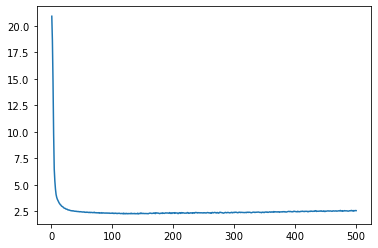

In [46]:
# 검증점수  epoch당 
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.show()

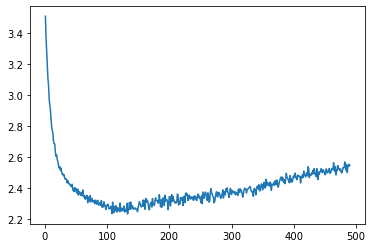

In [47]:
# 처음 10개의 포인터를 제외하고 그려보면
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1), truncated_mae_history)
plt.show()

In [48]:
# 다시 훈련
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 16.2927 - mae: 2.5438


In [49]:
test_mae_score

2.543843984603882

In [50]:
predictions = model.predict(test_data)
predictions[0]

array([9.657403], dtype=float32)